In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import folium
import math
import plotly.graph_objects as go
import plotly.express as px
import graphviz
import networkx as nx
import time

from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from sklearn import tree
from matplotlib import pyplot as plt
from pdpbox import pdp, info_plots
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [87]:
# !pip install geopy 
# !pip install Nominatim
# !pip install folium

In [88]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372", "#ffc970", "#f9f871"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

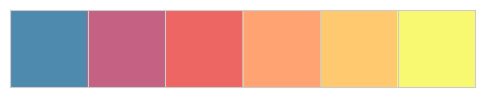

In [89]:
sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

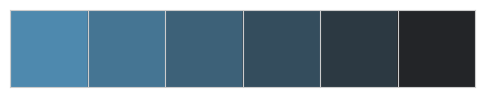

In [90]:
mumbai = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

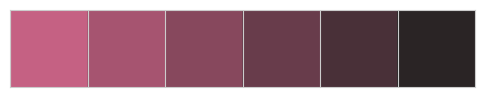

In [91]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

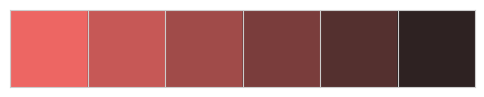

In [92]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)

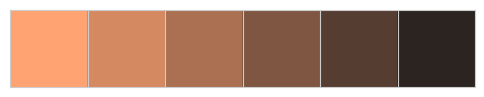

In [93]:
hyderabad = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyderabad),size=1)

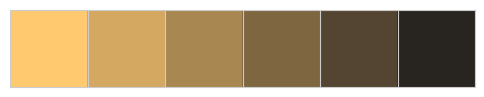

In [94]:
bangalore = sns.dark_palette(custom_colors[4], reverse=True)
sns.palplot(sns.color_palette(bangalore),size=1)

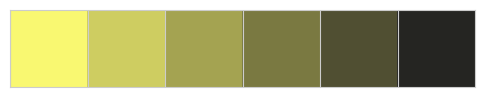

In [95]:
kolkata = sns.dark_palette(custom_colors[5], reverse=True)
sns.palplot(sns.color_palette(kolkata),size=1)

In [96]:
df1 = pd.read_csv('./data/Mumbai.csv')
df2 = pd.read_csv('./data/Delhi.csv')
df3 = pd.read_csv('./data/Chennai.csv')
df4 = pd.read_csv('./data/Hyderabad.csv')
df5 = pd.read_csv('./data/Bangalore.csv')
df6 = pd.read_csv('./data/Kolkata.csv')


In [97]:
df1.head(5)

Price  Area  Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  4850000   720  Kharghar                1       1                 1   
1  4500000   600  Kharghar                1       1                 1   
2  6700000   650  Kharghar                1       1                 1   
3  4500000   650  Kharghar                1       1                 1   
4  5000000   665  Kharghar                1       1                 1   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  0             1  ...   
2          1             1                  0             1  ...   
3          0             0                  1             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              1    0                1          0           0   0   
3              1    1                1          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         1             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [98]:
df2.head(5)

Price  Area          Location  No. of Bedrooms  Resale  \
0  10500000  1200  Sector 10 Dwarka                2       1   
1   6000000  1000       Uttam Nagar                3       0   
2  15000000  1350      Sarita Vihar                2       1   
3   2500000   435       Uttam Nagar                2       0   
4   5800000   900        Dwarka Mor                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 0          1             0                  0             1   
1                 0          0             0                  0             0   
2                 0          0             0                  0             0   
3                 0          0             0                  0             0   
4                 0          0             0                  0             0   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                1          0           0   0   
1  ...              0    0                0          0           0   0   
2  ...              0    0                0          0           0   0   
3  ...              0    0                1          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [99]:
df3.head(5)

Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          0             0                  0             0  ...   
1          1             1                  1             0  ...   
2          1             1                  1             1  ...   
3          1             1                  0             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              0    0                0          0           0   0   
1              1    0                0          0           0   0   
2              0    0                0          0           0   0   
3              0    0                0          0           0   0   
4              0    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [100]:
df4.head(5)

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000  1340     Nizampet                2       0                 0   
1  29000000  3498  Hitech City                4       0                 0   
2   6590000  1318    Manikonda                2       0                 0   
3   5739000  1295        Alwal                3       1                 0   
4   5679000  1145   Kukatpally                2       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                1          0           0   0   
1              1    0                1          0           0   0   
2              0    0                0          0           0   0   
3              1    0                0          0           0   0   
4              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [101]:
df5.head(5)

Price  Area                         Location  No. of Bedrooms  Resale  \
0  30000000  3340                 JP Nagar Phase 1                4       0   
1   7888000  1045       Dasarahalli on Tumkur Road                2       0   
2   4866000  1179  Kannur on Thanisandra Main Road                2       0   
3   8358000  1675                     Doddanekundi                3       0   
4   6845000  1670                          Kengeri                3       0   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0                 1          1             1                  1             1   
1                 0          1             1                  1             1   
2                 0          1             1                  1             1   
3                 0          0             0                  0             0   
4                 1          1             1                  1             1   

   ...  LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0  ...              1    0                0          0           0   0   
1  ...              1    0                1          0           0   0   
2  ...              1    0                0          0           0   0   
3  ...              1    0                0          0           0   0   
4  ...              1    0                0          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [102]:
df6.head(5)

Price  Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0  2235000  1016      Barasat                3       0                 0   
1  3665999  1111    Keshtopur                2       0                 1   
2  3774000  1020     Rajarhat                2       0                 0   
3  2524000   935  Narendrapur                2       0                 0   
4  8300000  1956     New Town                3       1                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             0                  1             1  ...   
2          1             0                  0             0  ...   
3          1             1                  1             1  ...   
4          1             1                  1             1  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0                0          0           0   0   
1              0    0                0          0           0   0   
2              1    0                0          0           0   0   
3              0    0                0          0           0   0   
4              1    0                1          0           0   0   

   DiningTable  Sofa  Wardrobe  Refrigerator  
0            0     0         0             0  
1            0     0         0             0  
2            0     0         0             0  
3            0     0         0             0  
4            0     0         0             0  

[5 rows x 40 columns]

In [103]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)
df5.replace(9, np.nan, inplace=True)
df6.replace(9, np.nan, inplace=True)

In [104]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()

In [105]:
print(f"{y_}Mumbai:{r_}{df1.shape}\n")
print(f"{y_}Delhi:{r_}{df2.shape}\n")
print(f"{y_}Chennai:{r_}{df3.shape}\n")
print(f"{y_}Hyderabad:{r_}{df4.shape}\n")
print(f"{y_}Bangalore:{r_}{df5.shape}\n")
print(f"{y_}Kolkata:{r_}{df6.shape}\n")

Mumbai:(1398, 40)

Delhi:(2002, 40)

Chennai:(2233, 40)

Hyderabad:(2434, 40)

Bangalore:(1951, 40)

Kolkata:(75, 40)



In [106]:
print(f"{y_}Data types of data columns: \n{m_}{df1.dtypes}")

Data types of data columns: 
Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED       

In [107]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df2['Price']/100000
df3['Price'] = df3['Price']/100000
df4['Price'] = df4['Price']/100000
df5['Price'] = df5['Price']/100000
df6['Price'] = df6['Price']/100000


In [108]:
geolocator = Nominatim(user_agent="Ruch")

def feature_generation(df):
    lat=[]
    long=[]
    a=0
    for i in df['Location']: 
        location = geolocator.geocode(i)
        try:
            lat.append(location.latitude)
            long.append(location.longitude)
            print(a)
        except:
            lat.append("NA")
            long.append("NA")
        a=a+1
        time.sleep(1)
    df['Latitude'] = lat
    df['Longitude'] = long
    # wait for 10 seconds
    time.sleep(10)

In [109]:
# feature_generation(df1)
# feature_generation(df2)
# feature_generation(df3)
# feature_generation(df4)
# feature_generation(df5)
# feature_generation(df6)

In [110]:
# df1.to_csv('./data/working/Mumbai_updated.csv')
# df2.to_csv('./data/working/Delhi_updated.csv')
# df3.to_csv('./data/working/Chennai_updated.csv')
# df4.to_csv('./data/working/Hyderabad_updated.csv')
# df5.to_csv('./data/working/Bangalore_updated.csv')
# df6.to_csv('./data/working/Kolkata_updated.csv')

In [111]:
df1 = pd.read_csv('./data/working/Mumbai_updated.csv')
df2 = pd.read_csv('./data/working/Delhi_updated.csv')
df3 = pd.read_csv('./data/working/Chennai_updated.csv')
df4 = pd.read_csv('./data/working/Hyderabad_updated.csv')
df5 = pd.read_csv('./data/working/Bangalore_updated.csv')
df6 = pd.read_csv('./data/working/Kolkata_updated.csv')

In [112]:
df1.head(5)

Unnamed: 0  Price  Area  Location  No. of Bedrooms  Resale  \
0           0   48.5   720  Kharghar                1       1   
1           1   45.0   600  Kharghar                1       1   
2           2   67.0   650  Kharghar                1       1   
3           3   45.0   650  Kharghar                1       1   
4           4   50.0   665  Kharghar                1       1   

   MaintenanceStaff  Gymnasium  SwimmingPool  LandscapedGardens  ...  \
0               1.0        0.0           0.0                0.0  ...   
1               1.0        1.0           1.0                0.0  ...   
2               1.0        1.0           1.0                0.0  ...   
3               1.0        0.0           0.0                1.0  ...   
4               1.0        0.0           0.0                1.0  ...   

   VaastuCompliant  Microwave  GolfCourse   TV  DiningTable  Sofa  Wardrobe  \
0              1.0        0.0         0.0  0.0          0.0   0.0       0.0   
1              1.0        0.0         0.0  0.0          0.0   0.0       0.0   
2              1.0        0.0         0.0  0.0          0.0   0.0       0.0   
3              1.0        0.0         0.0  0.0          0.0   0.0       1.0   
4              1.0        0.0         0.0  0.0          0.0   0.0       0.0   

   Refrigerator  Latitude  Longitude  
0           0.0  19.05253  73.073511  
1           0.0  19.05253  73.073511  
2           0.0  19.05253  73.073511  
3           0.0  19.05253  73.073511  
4           0.0  19.05253  73.073511  

[5 rows x 43 columns]

In [113]:
df1 = df1.drop(['Unnamed: 0'], axis = 1) 
df2 = df2.drop(['Unnamed: 0'], axis = 1) 
df3 = df3.drop(['Unnamed: 0'], axis = 1) 
df4 = df4.drop(['Unnamed: 0'], axis = 1) 
df5 = df5.drop(['Unnamed: 0'], axis = 1)
df6 = df6.drop(['Unnamed: 0'], axis = 1)

In [114]:
sns.set_style("whitegrid")

In [115]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

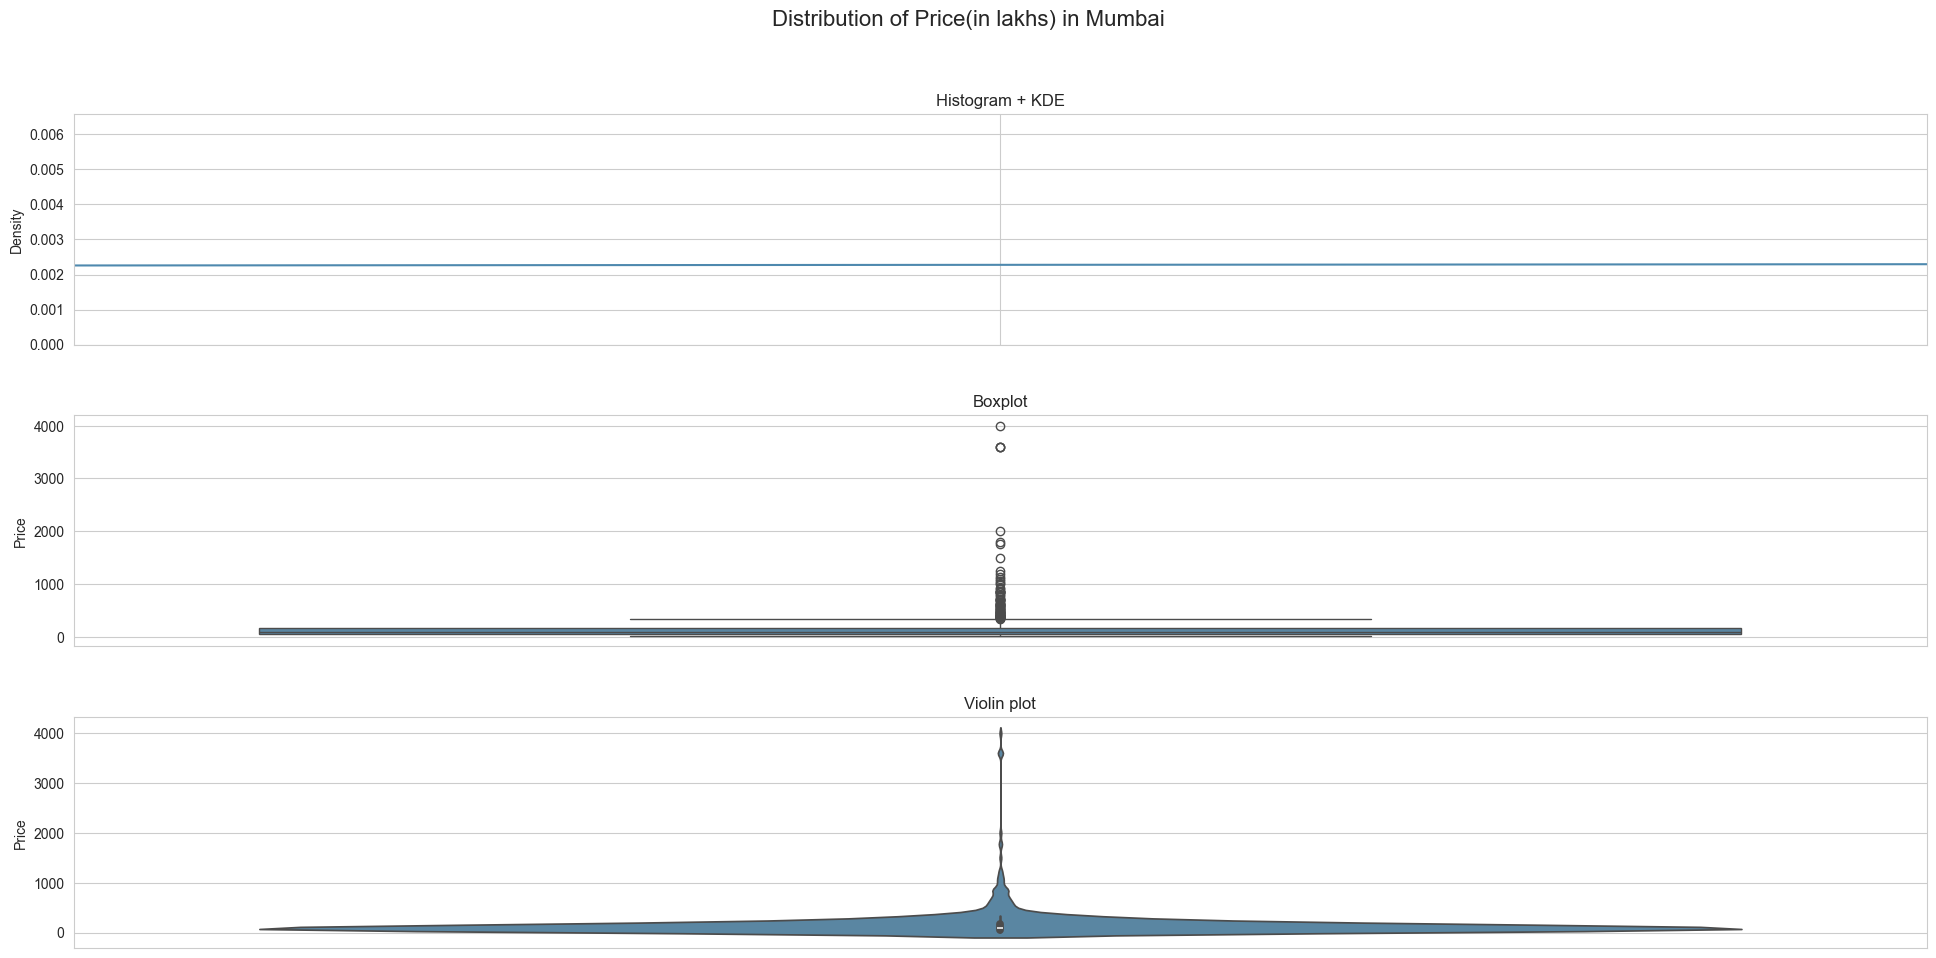

In [116]:
triple_plot(df1['Price'],'Distribution of Price(in lakhs) in Mumbai',custom_colors[0])

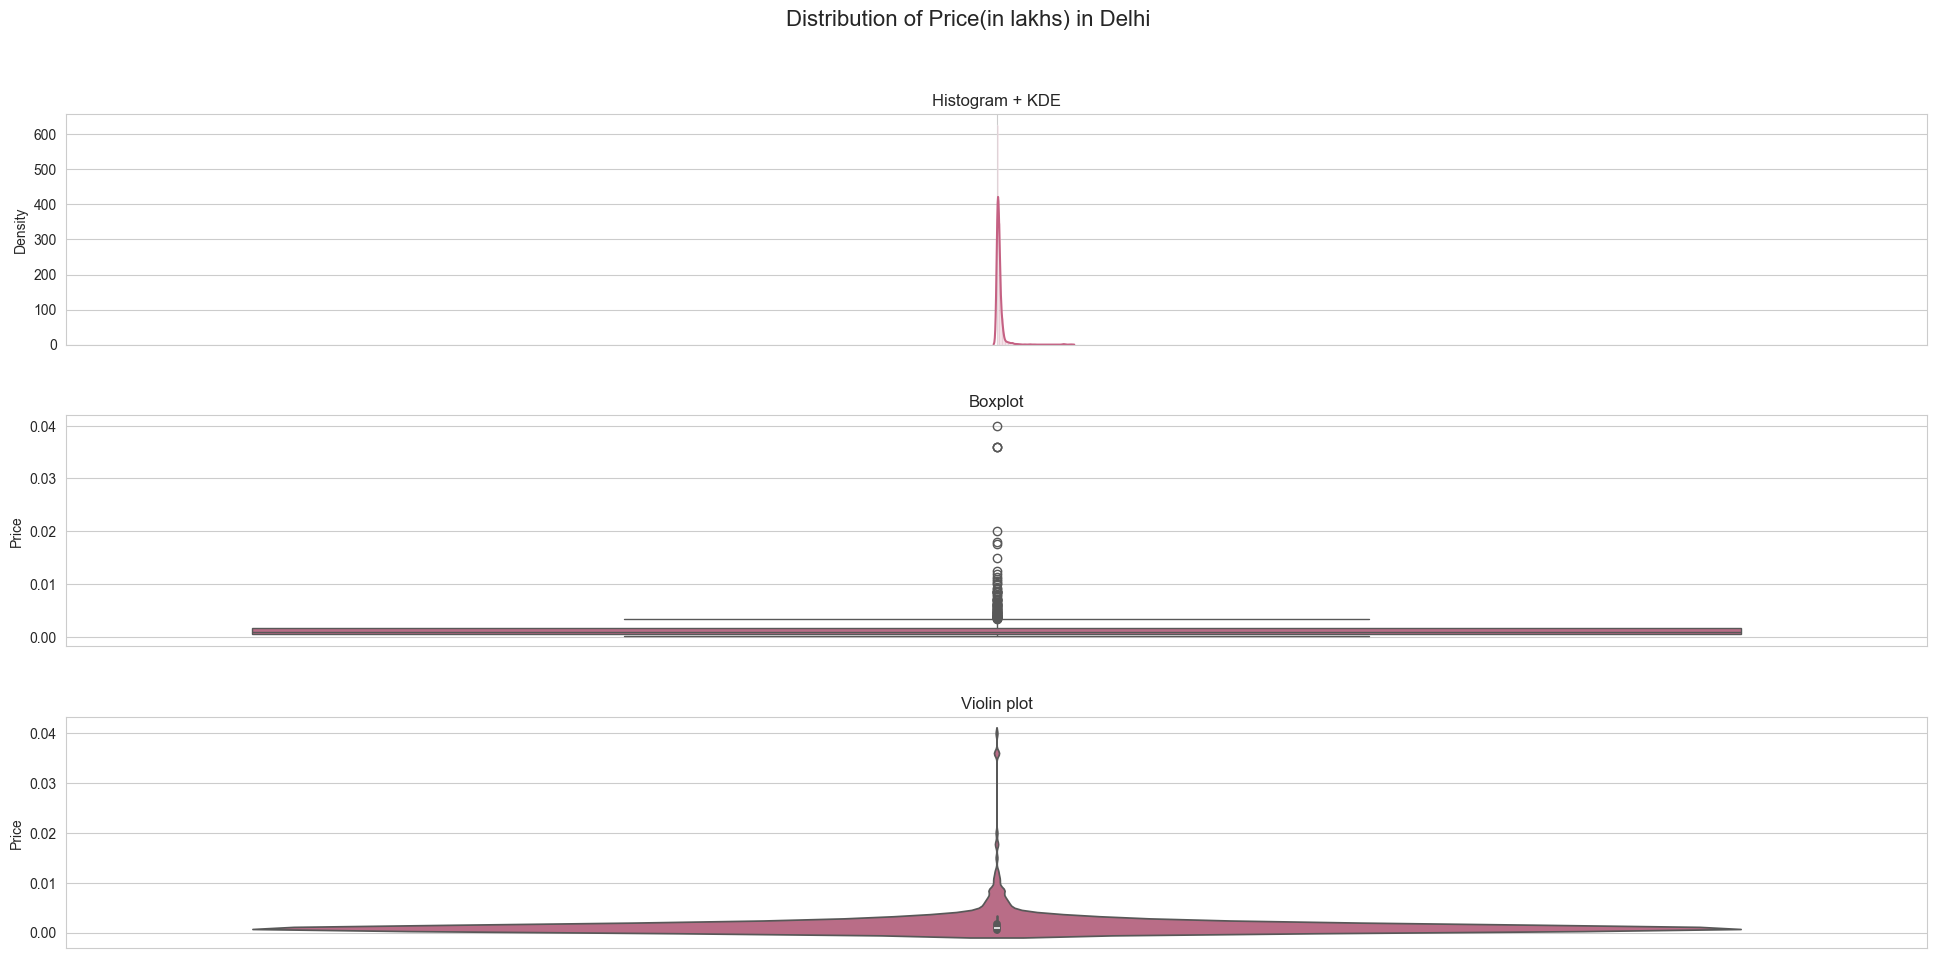

In [117]:
triple_plot(df2['Price'],'Distribution of Price(in lakhs) in Delhi',custom_colors[1])

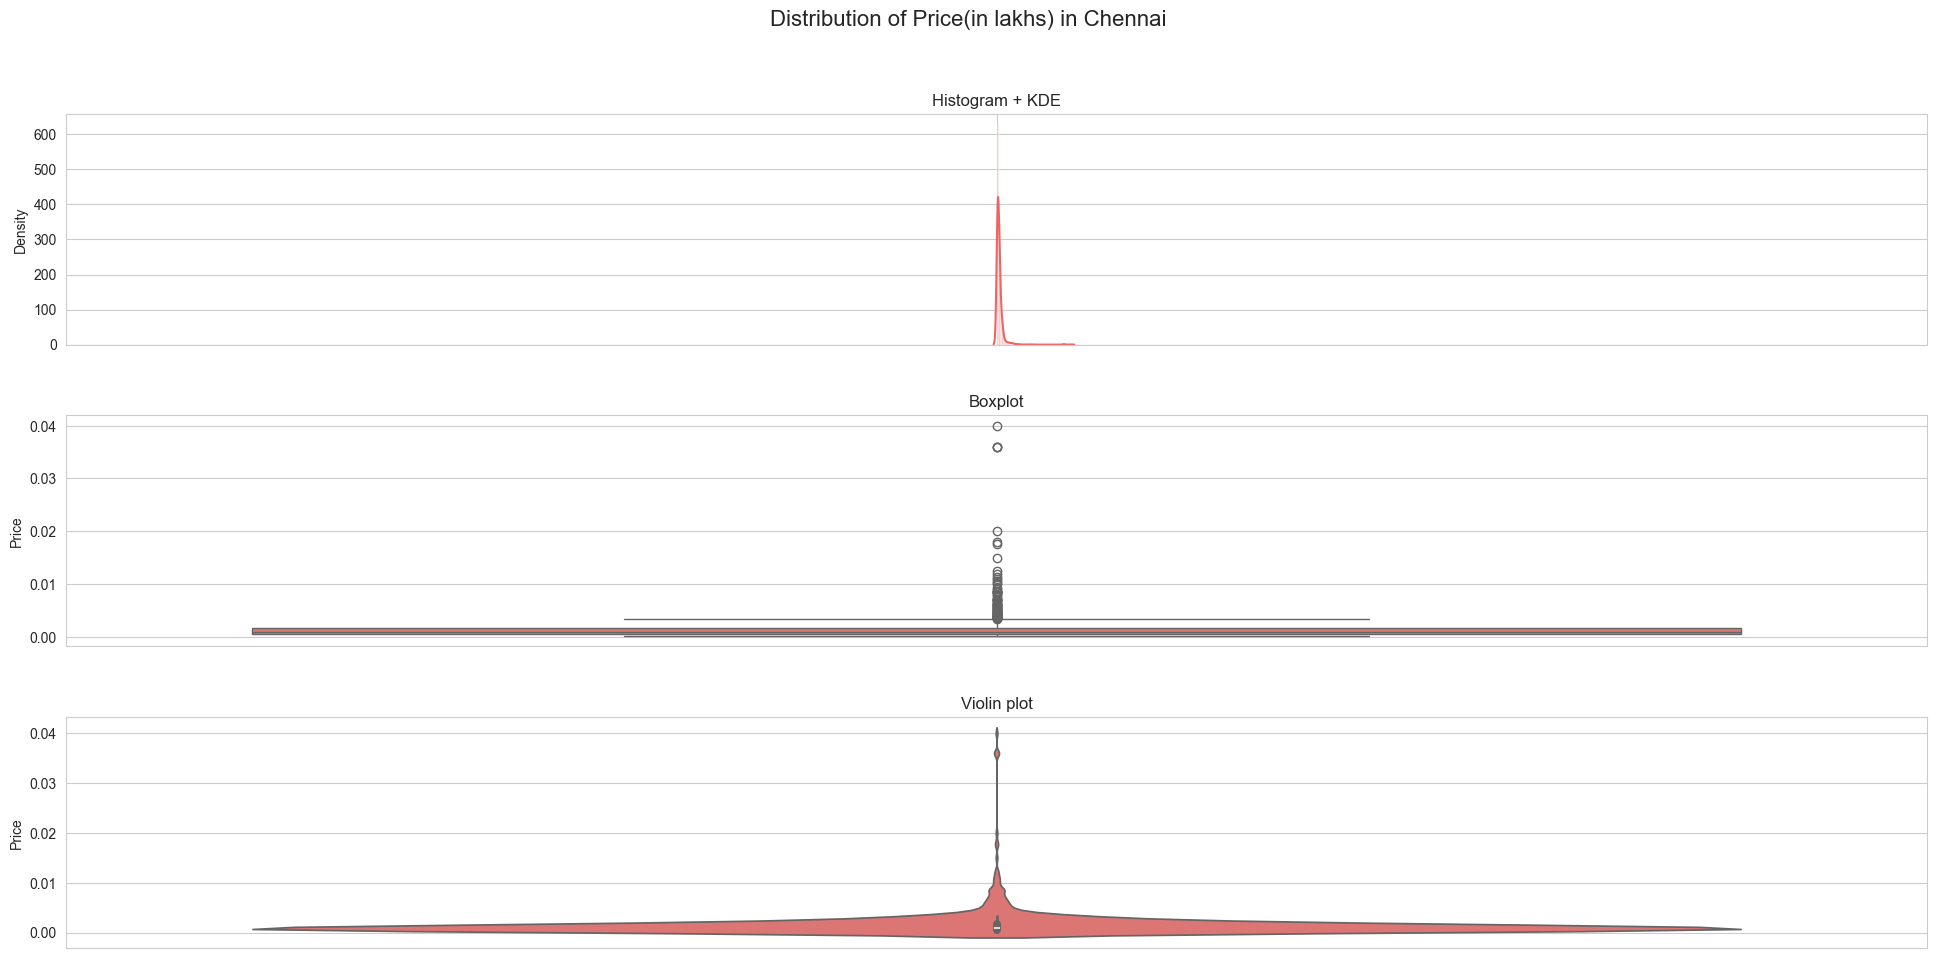

In [118]:
triple_plot(df3['Price'],'Distribution of Price(in lakhs) in Chennai',custom_colors[2])

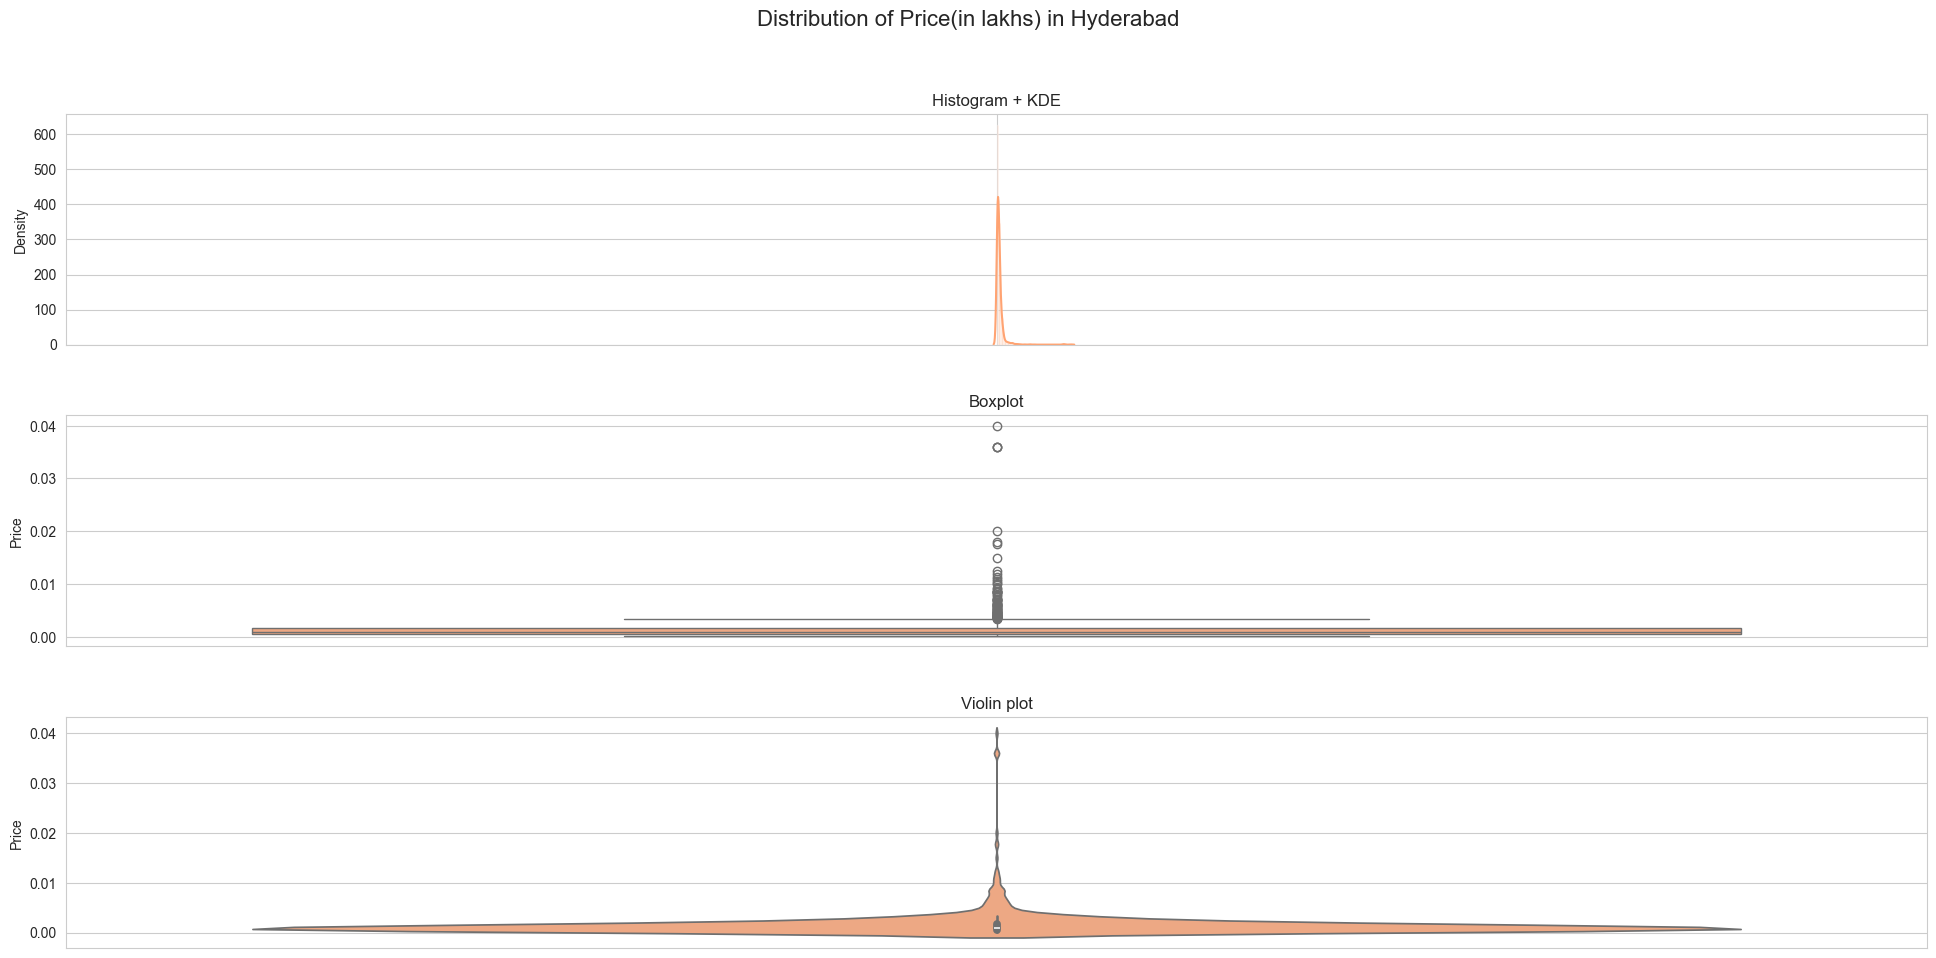

In [119]:
triple_plot(df4['Price'],'Distribution of Price(in lakhs) in Hyderabad',custom_colors[3])

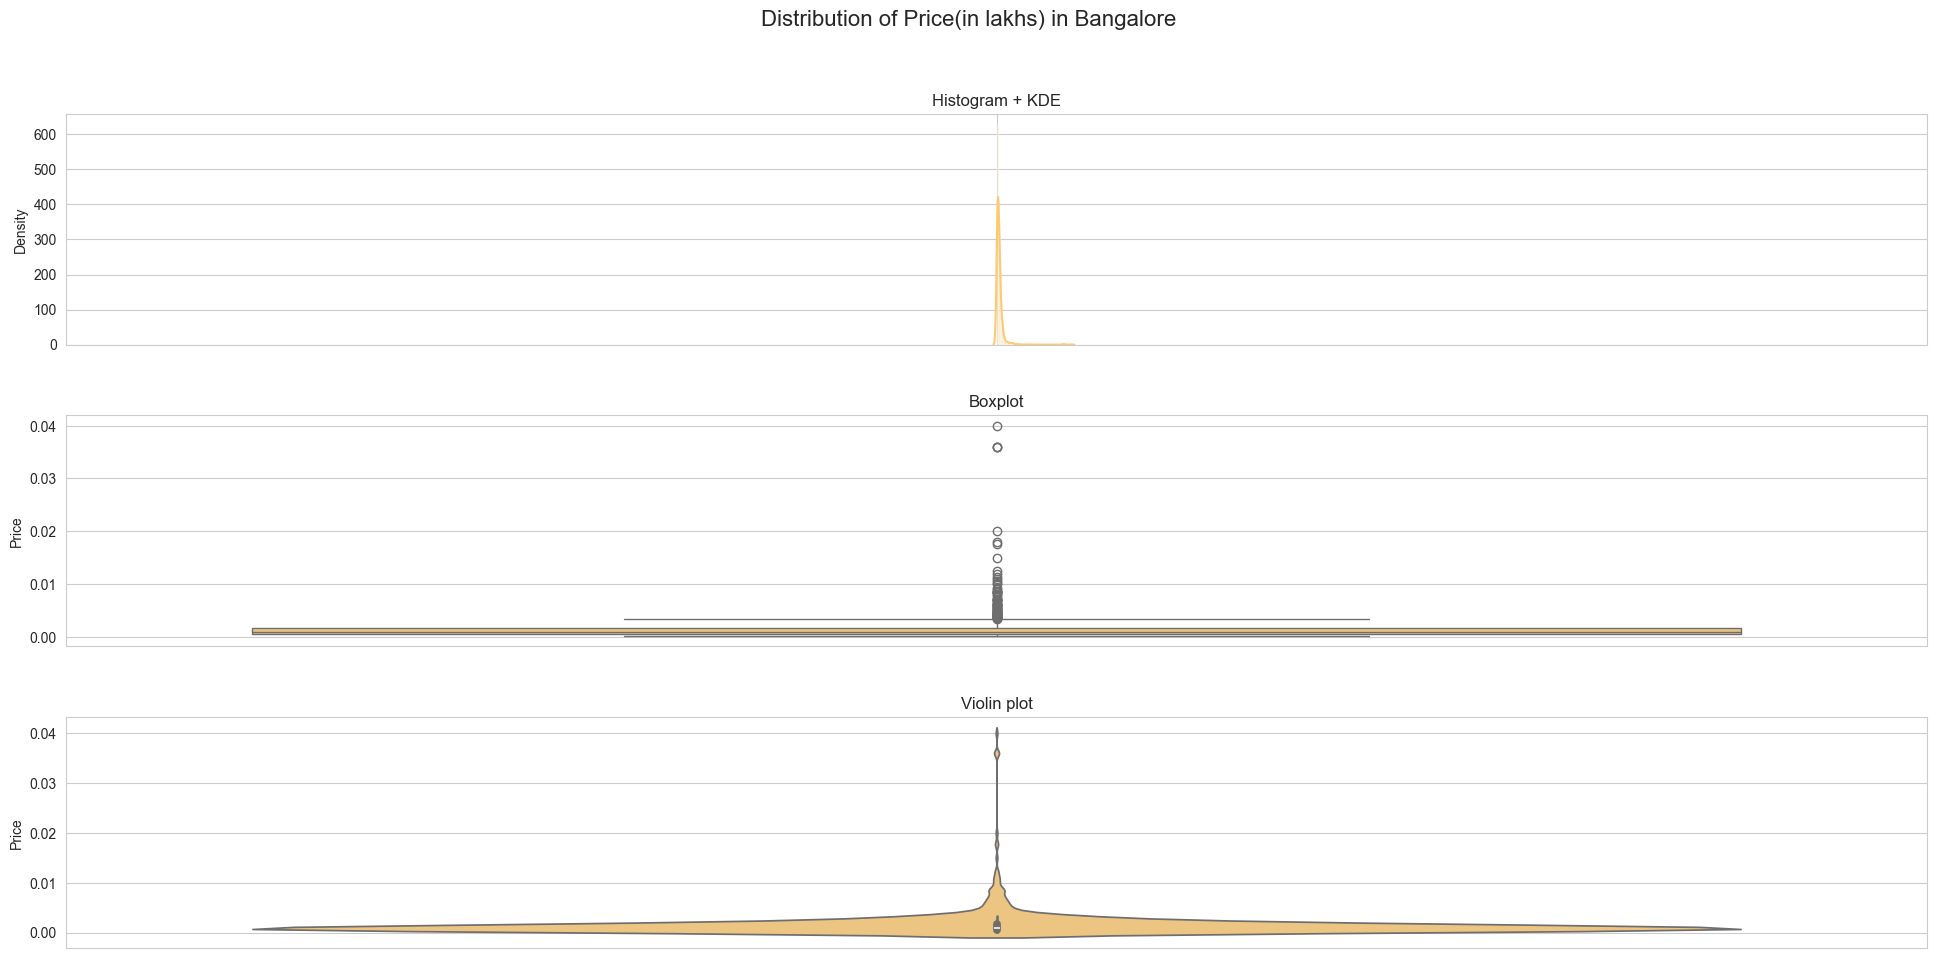

In [120]:
triple_plot(df5['Price'],'Distribution of Price(in lakhs) in Bangalore',custom_colors[4])

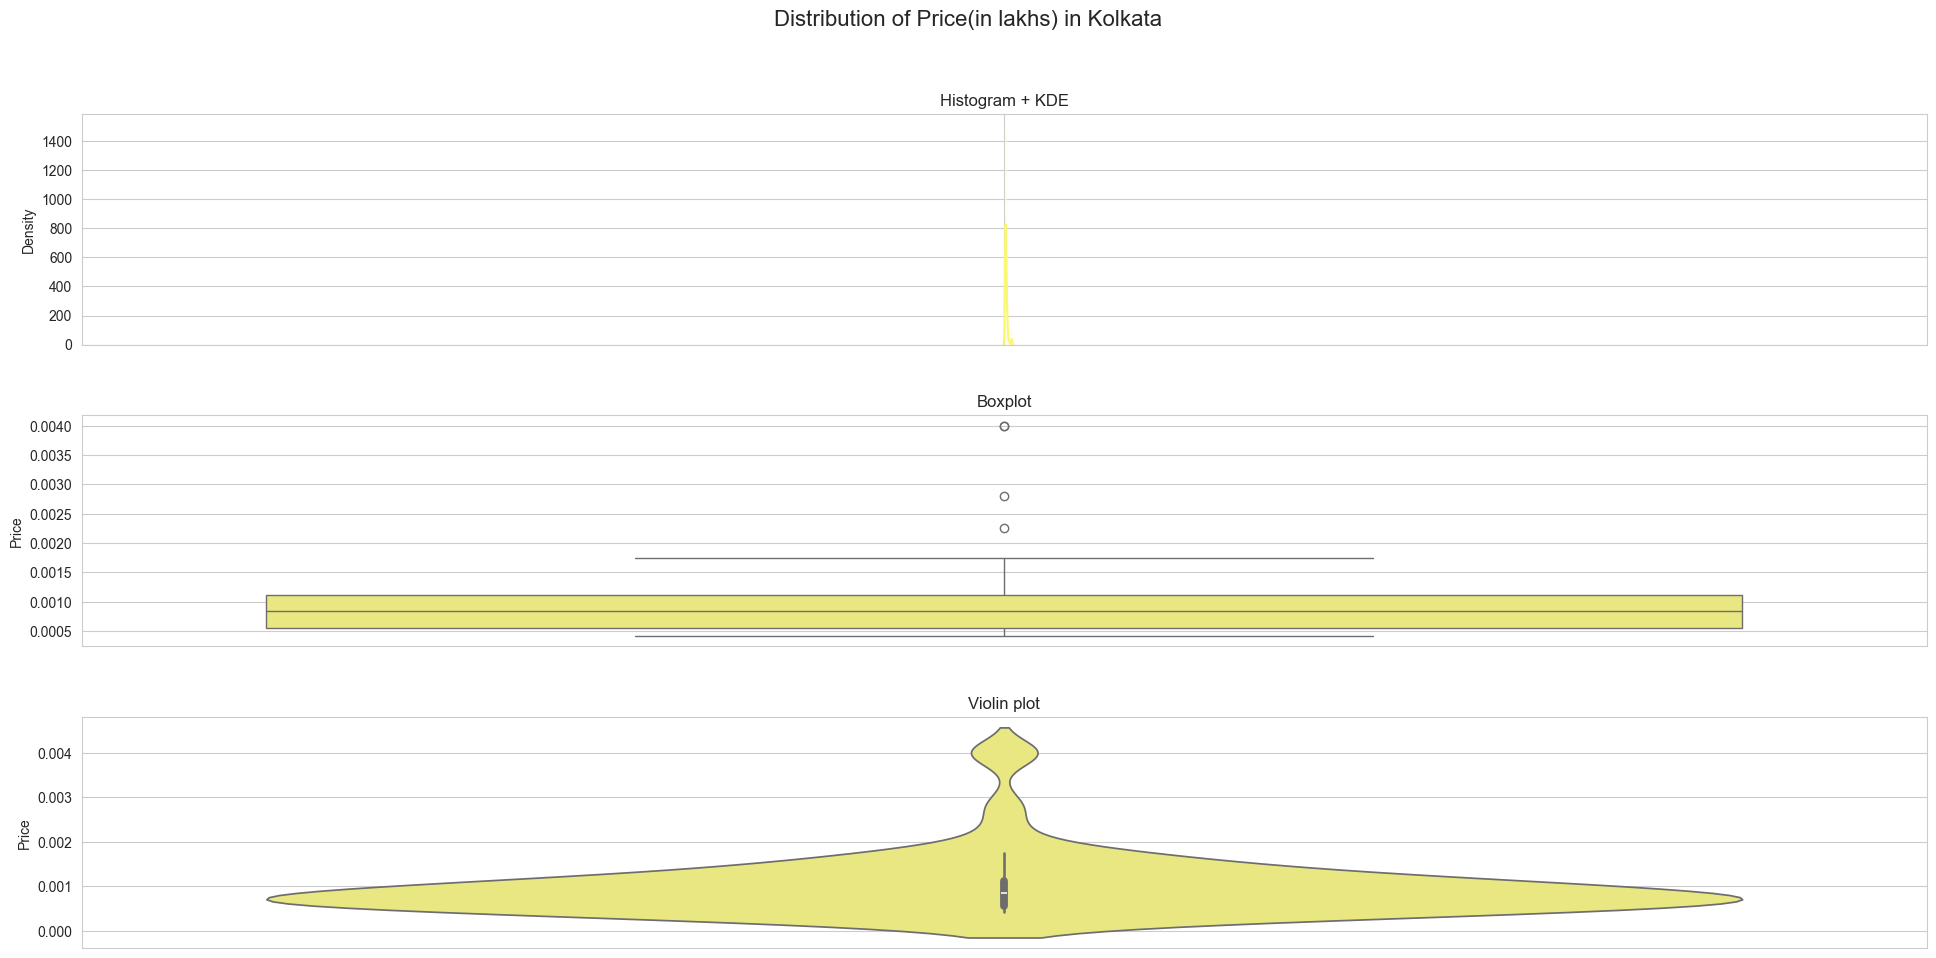

In [121]:
triple_plot(df6['Price'],'Distribution of Price(in lakhs) in Kolkata',custom_colors[5])

In [122]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

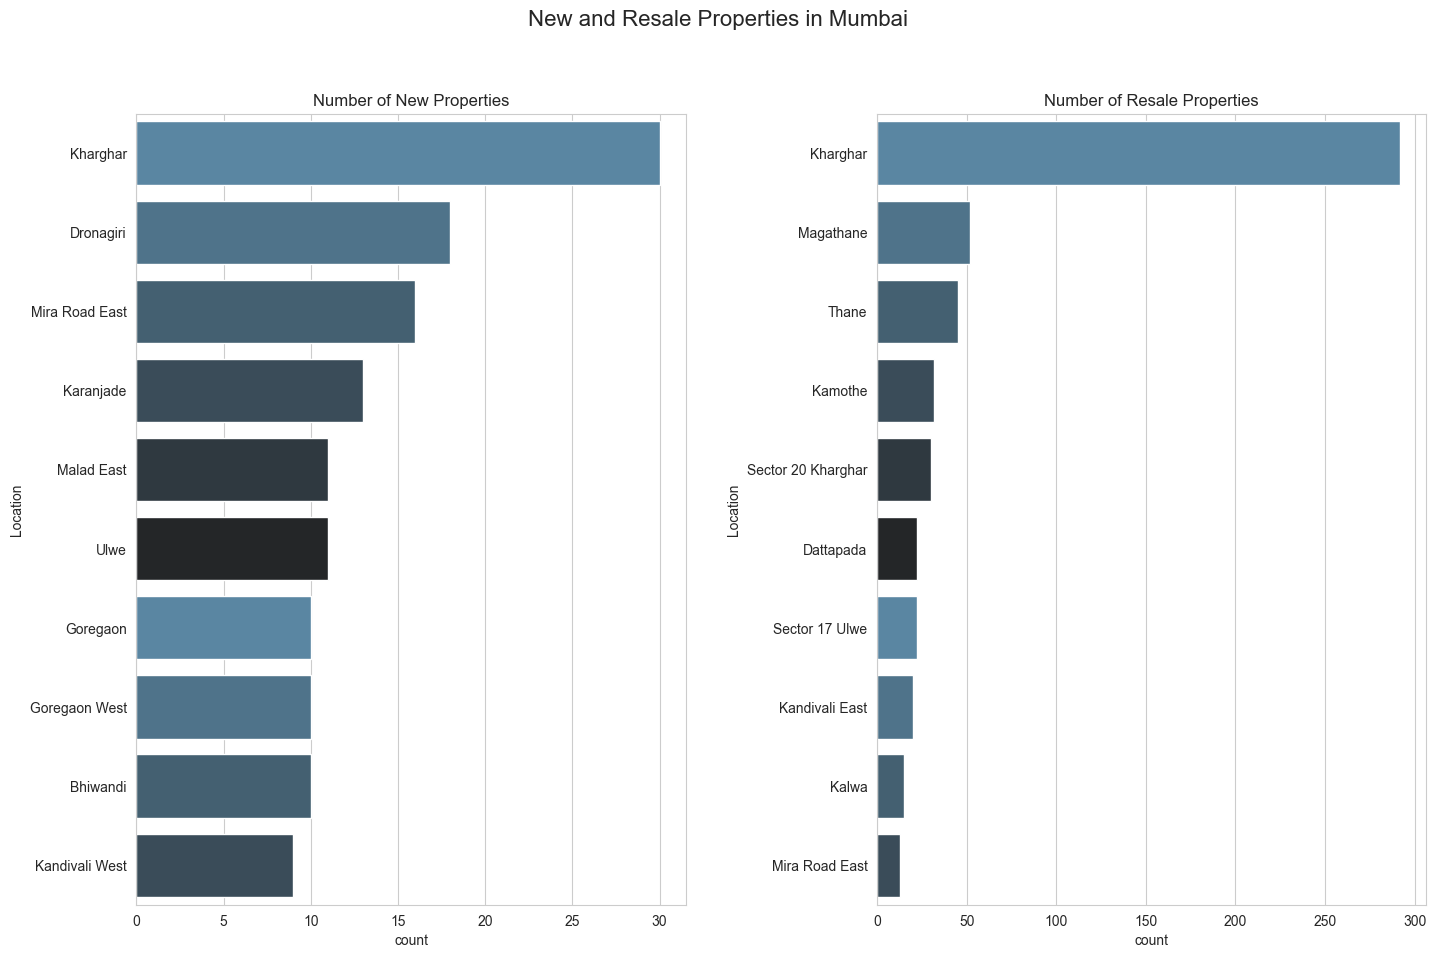

In [123]:
count_plot(df1,'New and Resale Properties in Mumbai',mumbai)

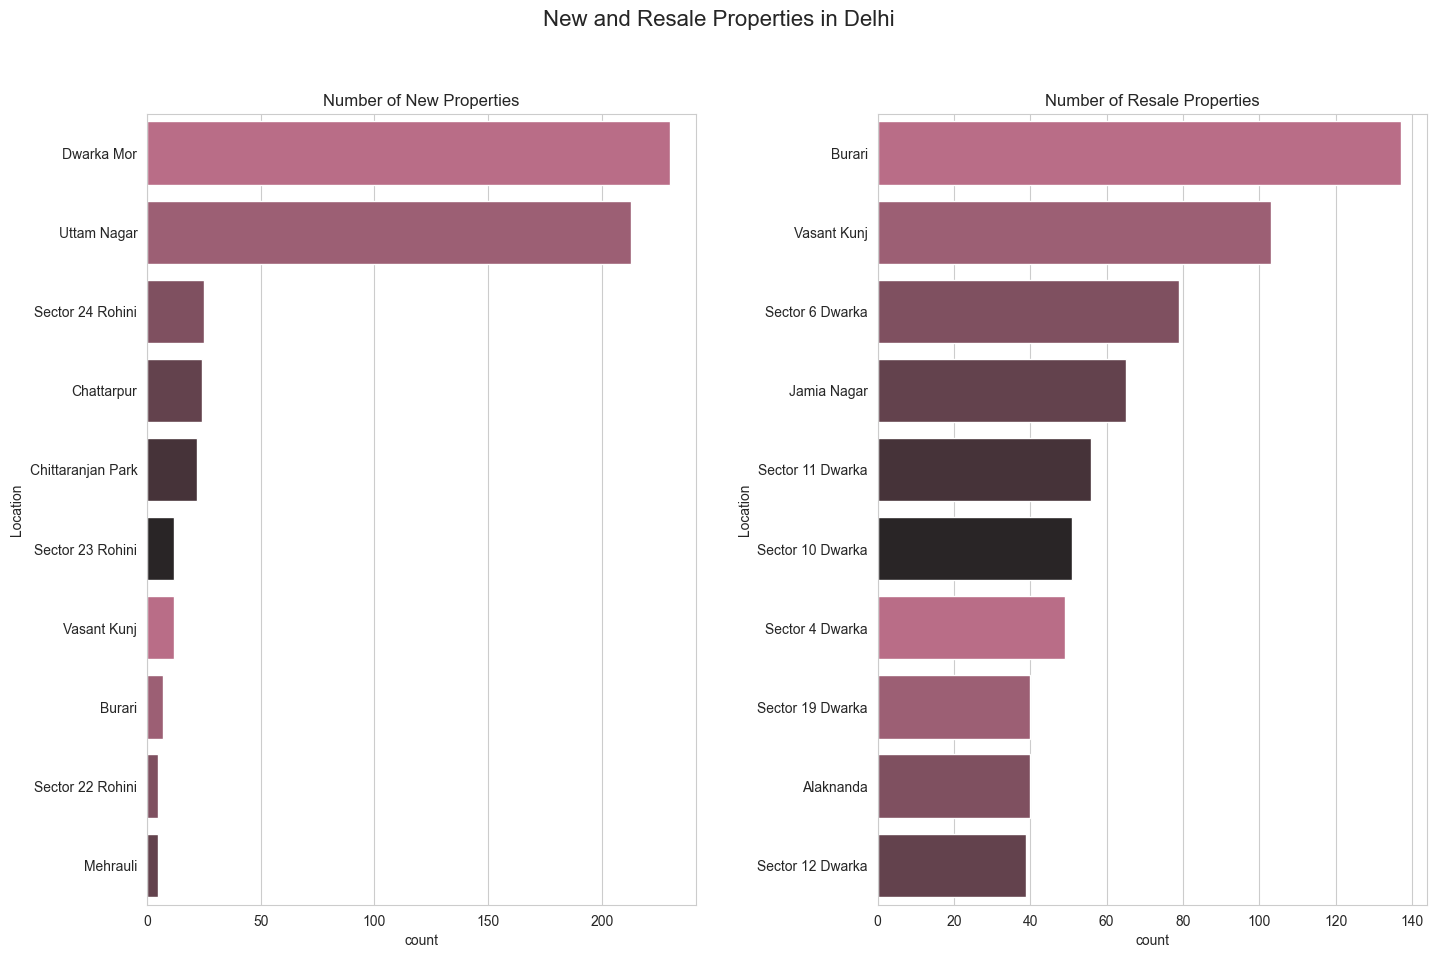

In [124]:
count_plot(df2,'New and Resale Properties in Delhi',delhi)

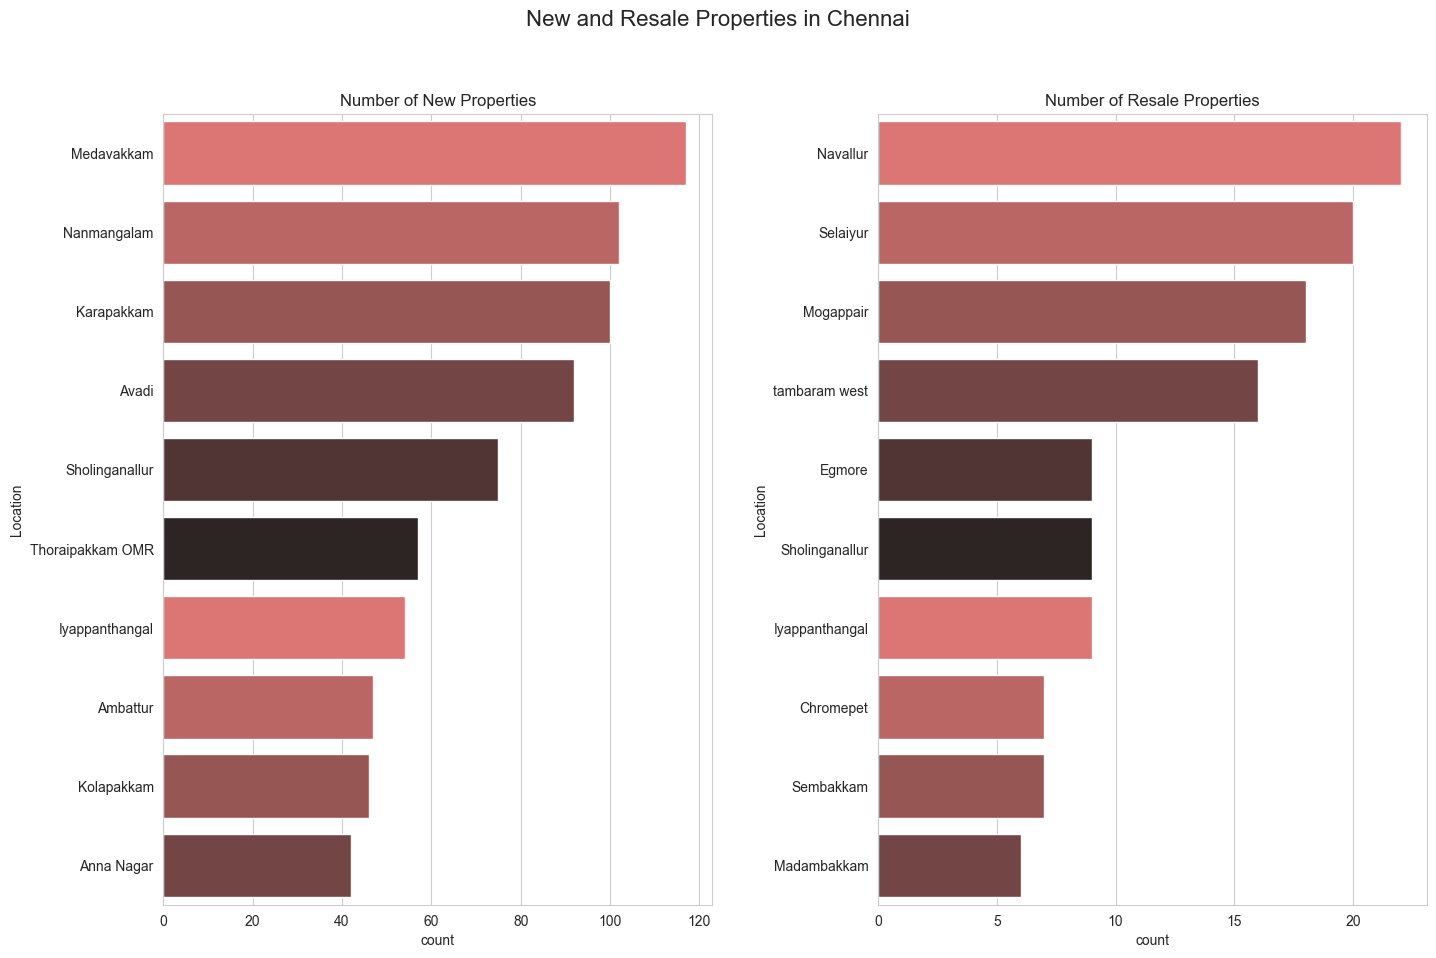

In [125]:
count_plot(df3,'New and Resale Properties in Chennai',chennai)

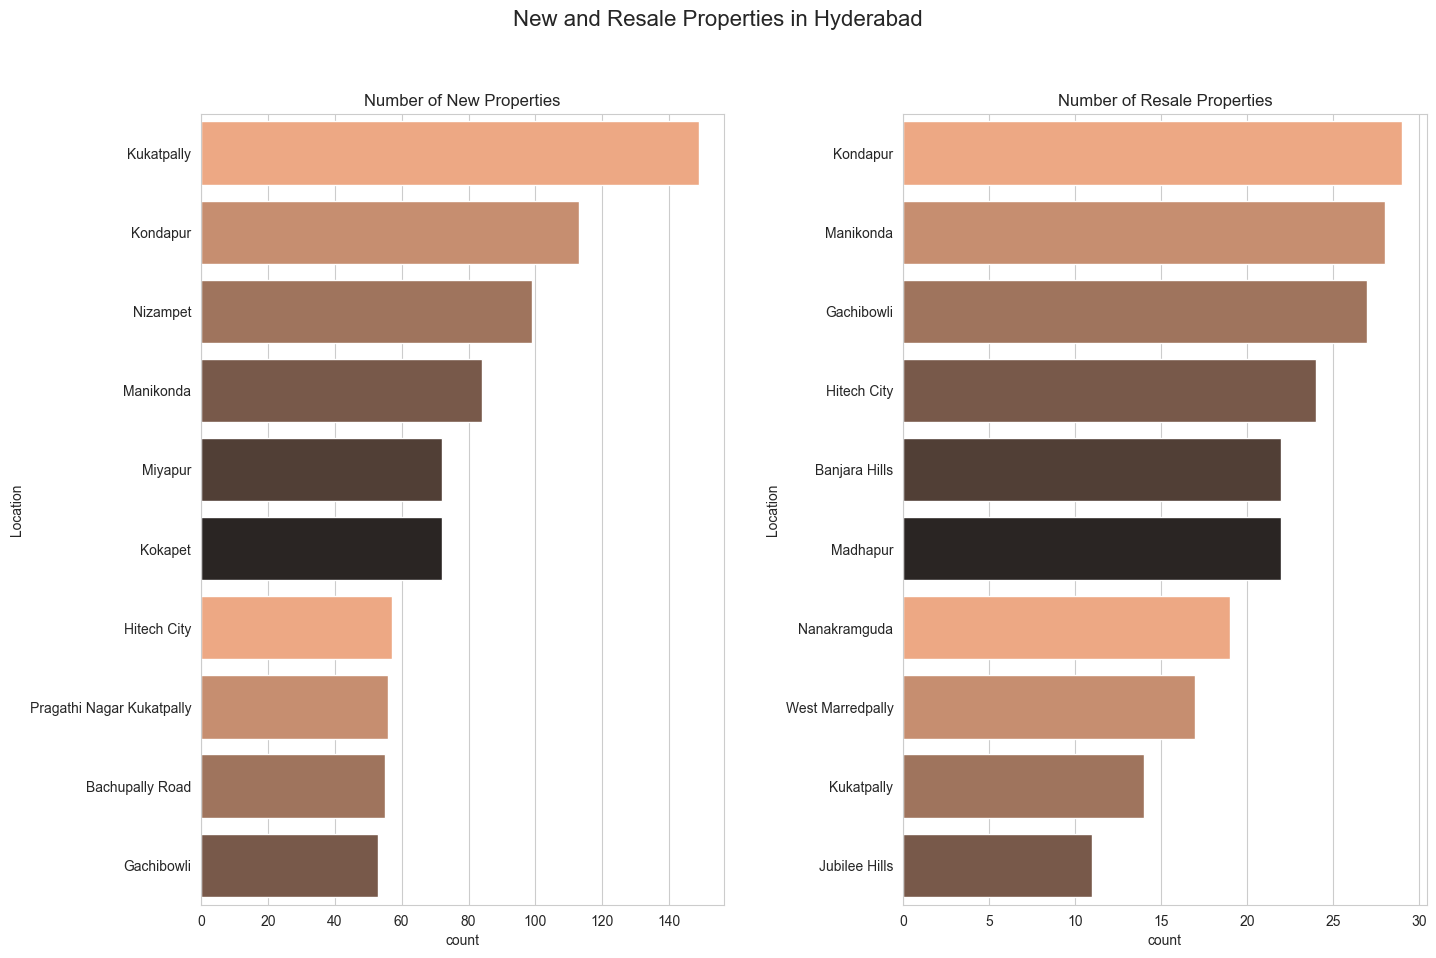

In [126]:
count_plot(df4,'New and Resale Properties in Hyderabad',hyderabad)

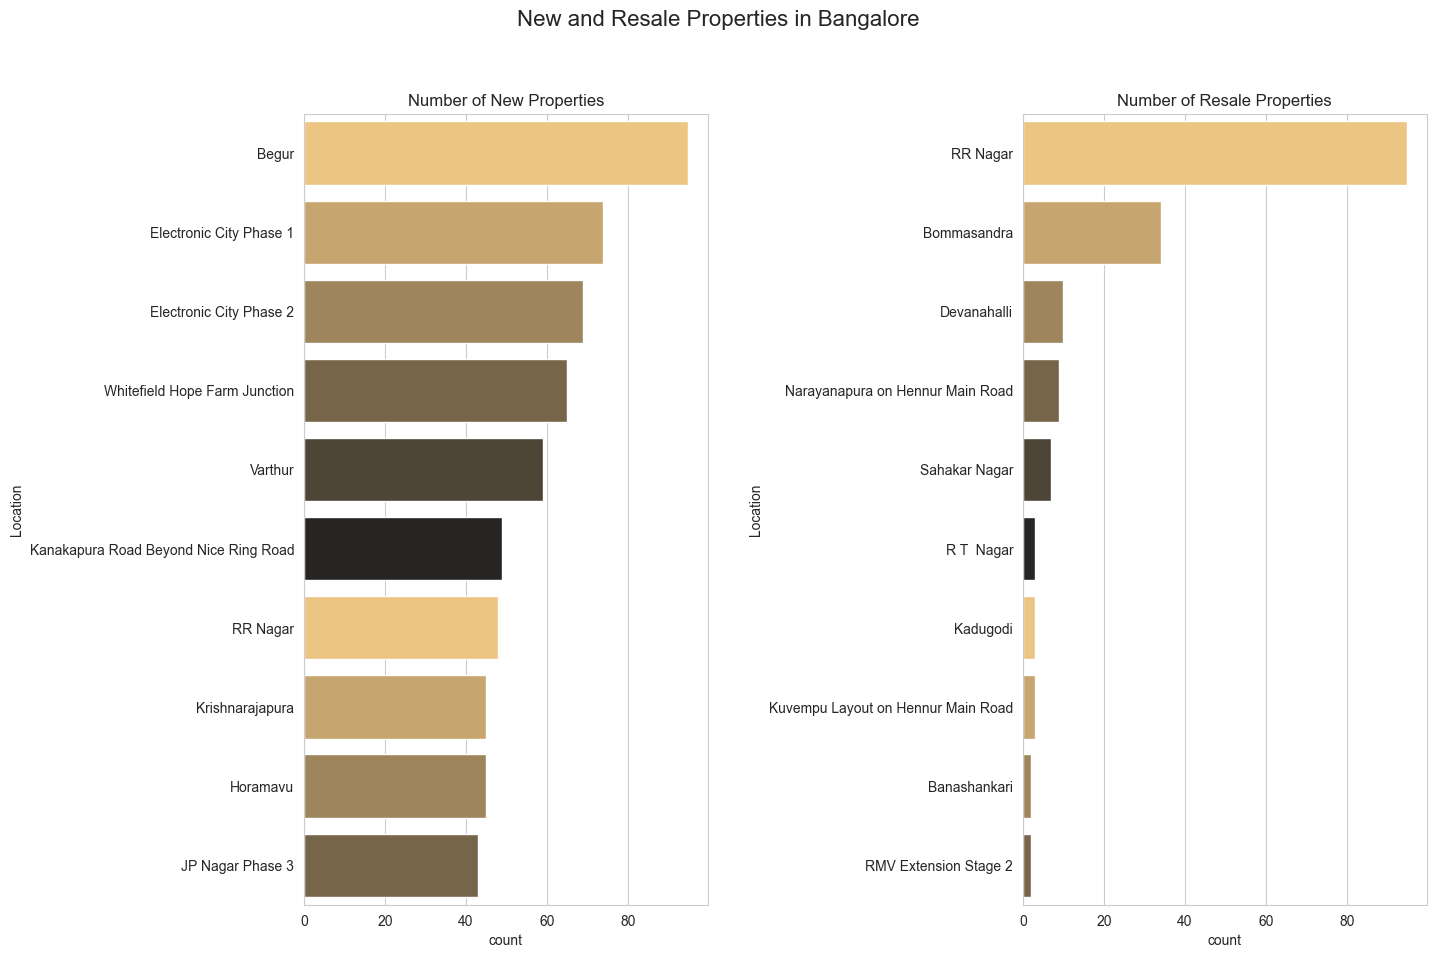

In [127]:
count_plot(df5,'New and Resale Properties in Bangalore',bangalore)

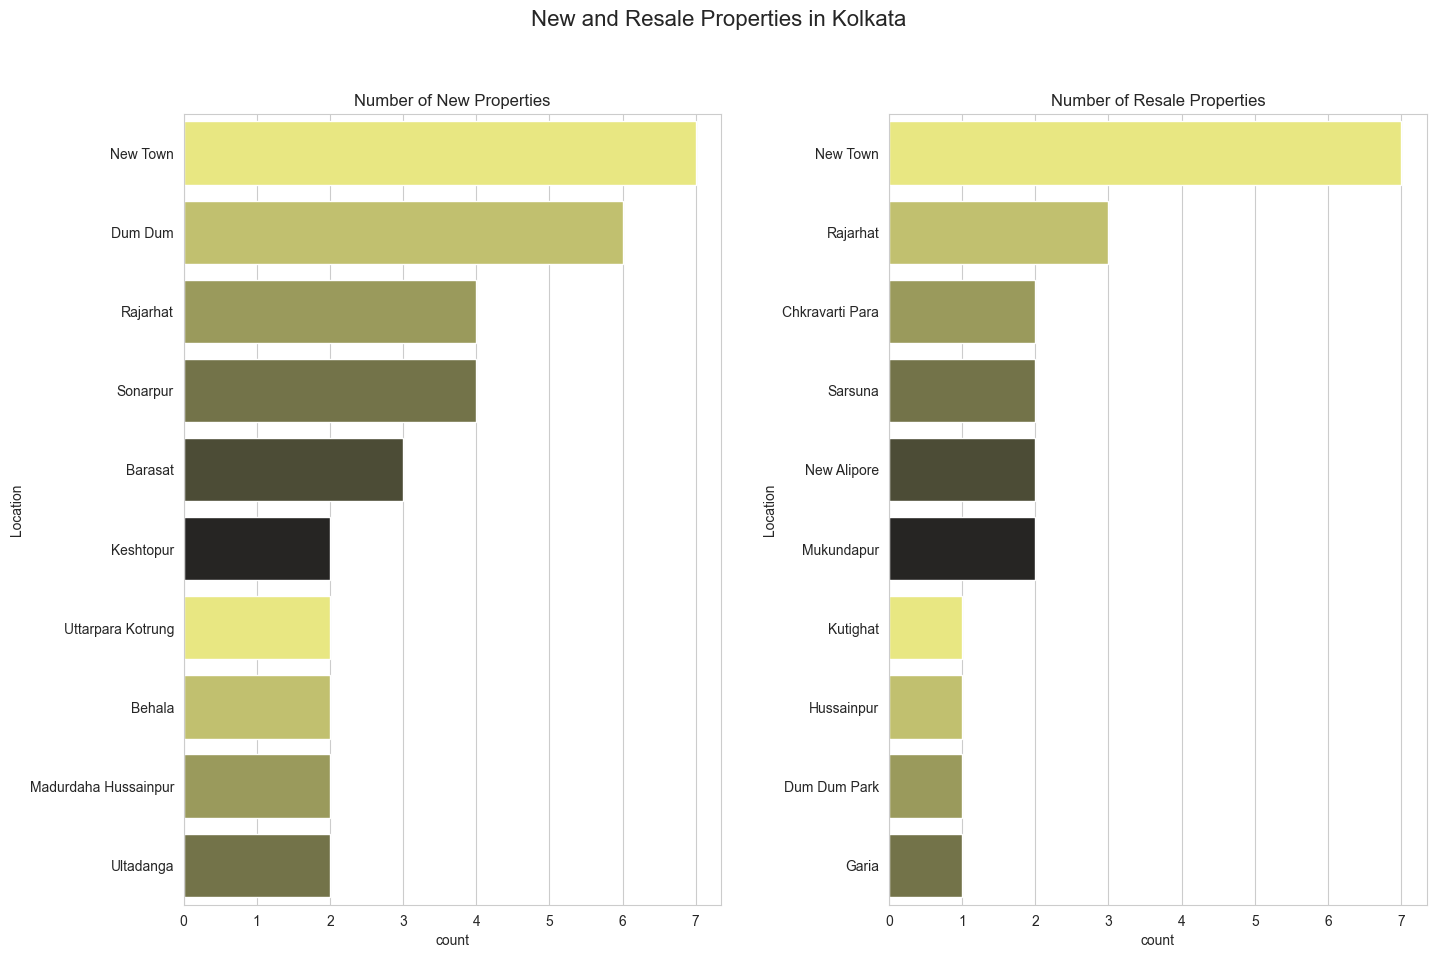

In [128]:
count_plot(df6,'New and Resale Properties in Kolkata',kolkata)

In [129]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

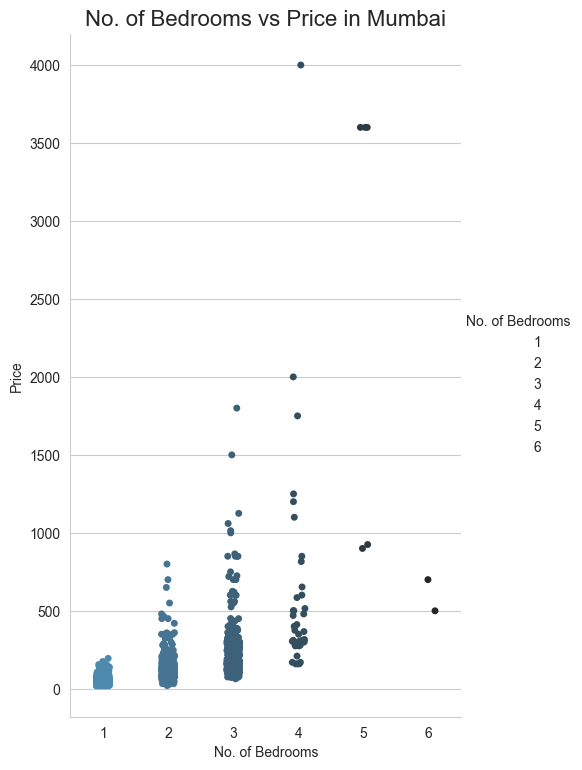

In [130]:
cat_plot(df1,'Mumbai',mumbai)

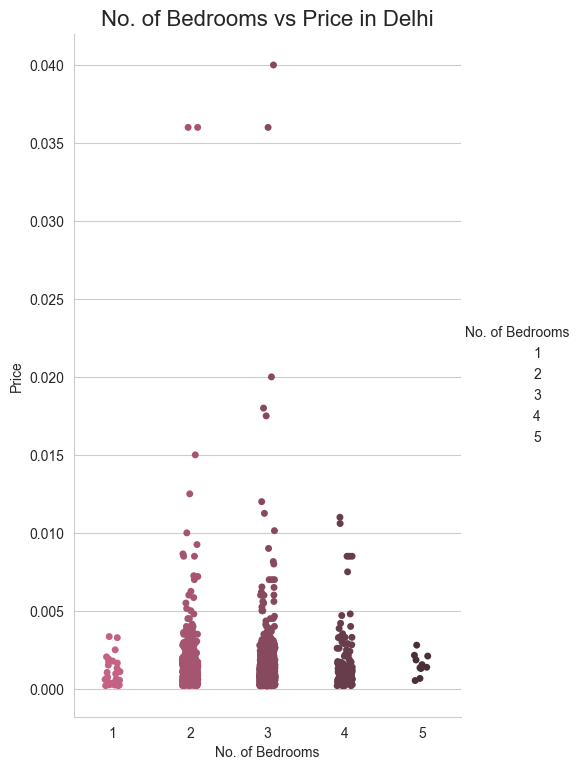

In [131]:
cat_plot(df2,'Delhi',delhi)

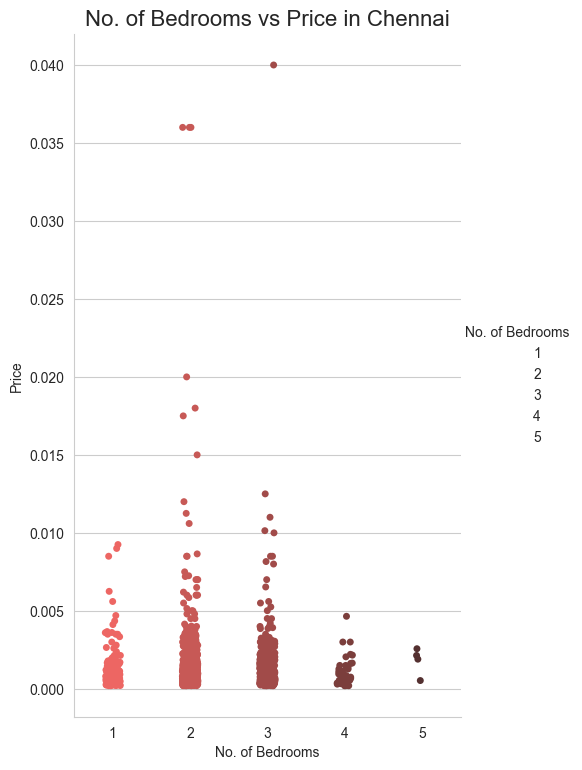

In [132]:
cat_plot(df3,'Chennai',chennai)

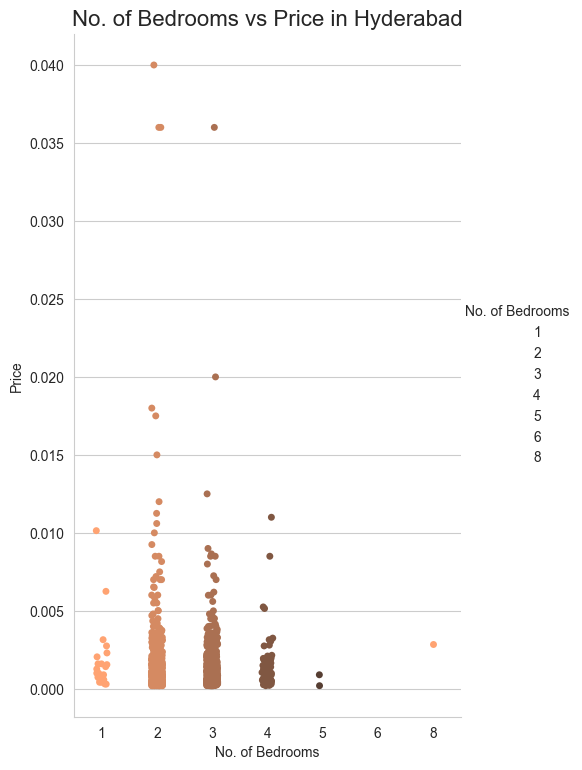

In [133]:
cat_plot(df4,'Hyderabad',hyderabad)

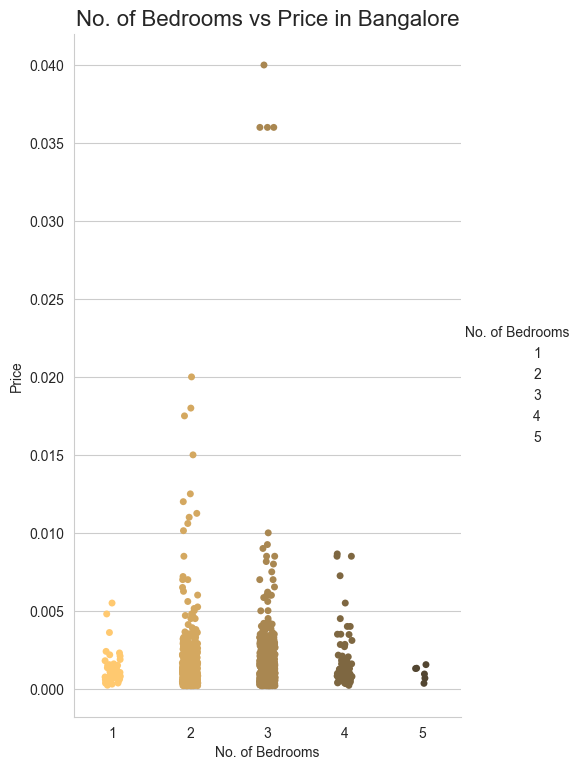

In [134]:
cat_plot(df5,'Bangalore',bangalore)

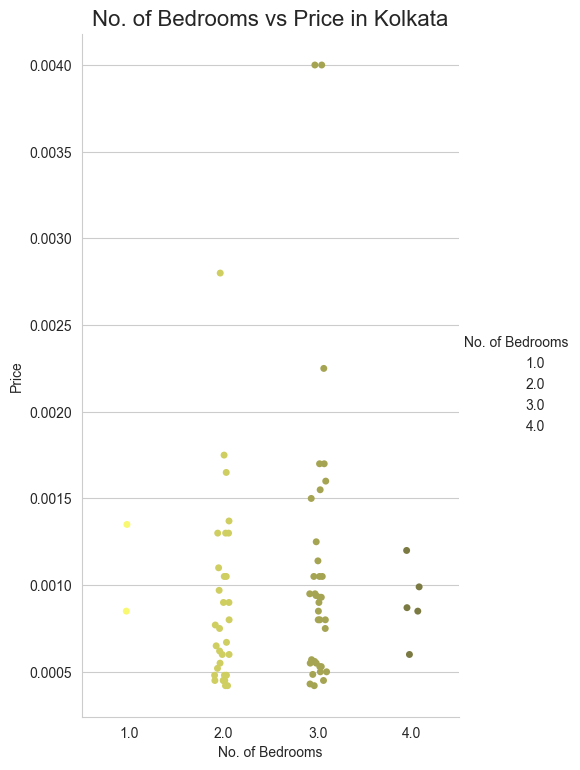

In [135]:
cat_plot(df6,'Kolkata',kolkata)

In [136]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

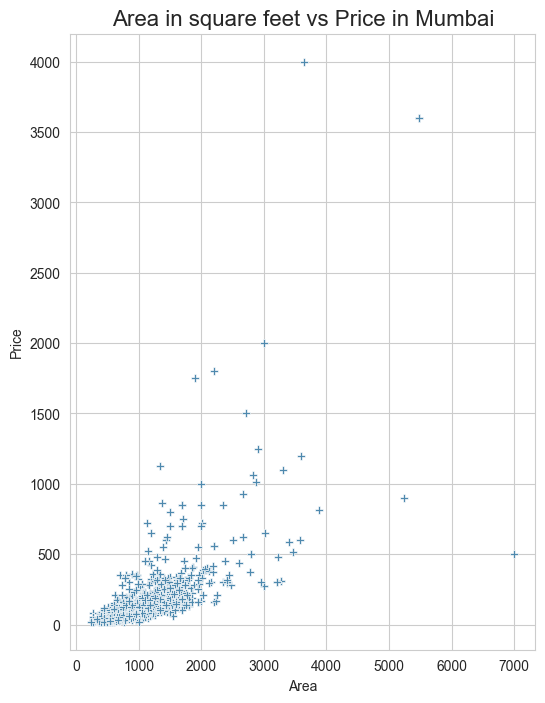

In [137]:
scatter_plot(df1,'Mumbai',custom_colors[0])

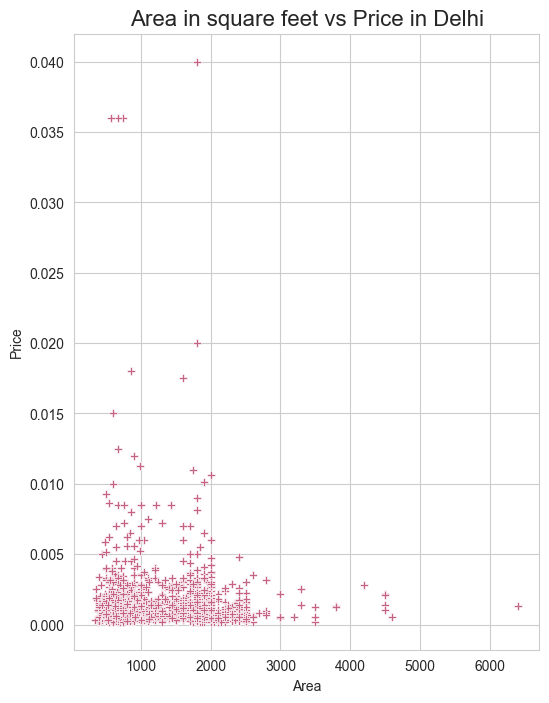

In [138]:
scatter_plot(df2,'Delhi',custom_colors[1])

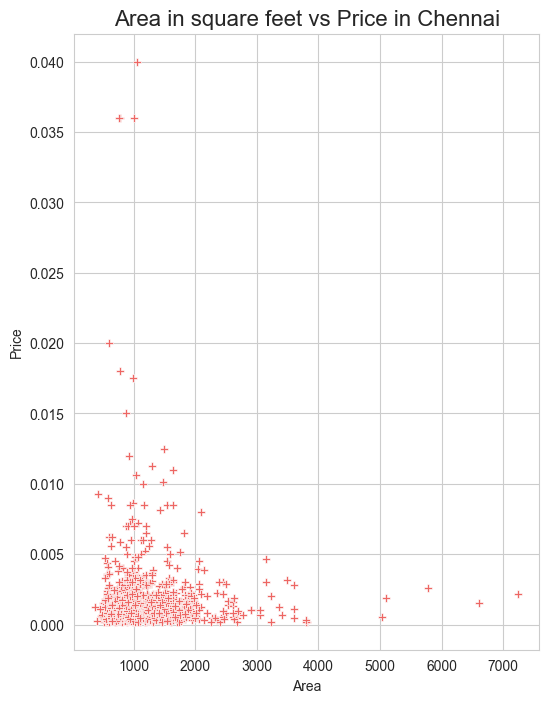

In [139]:
scatter_plot(df3,'Chennai',custom_colors[2])

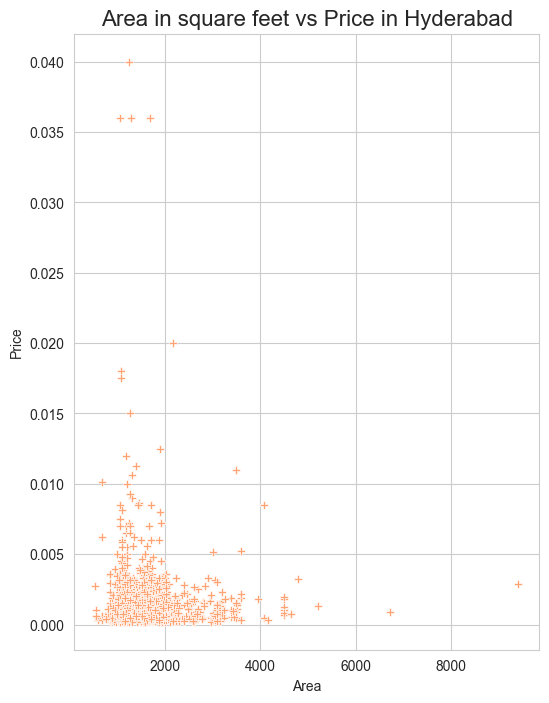

In [140]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

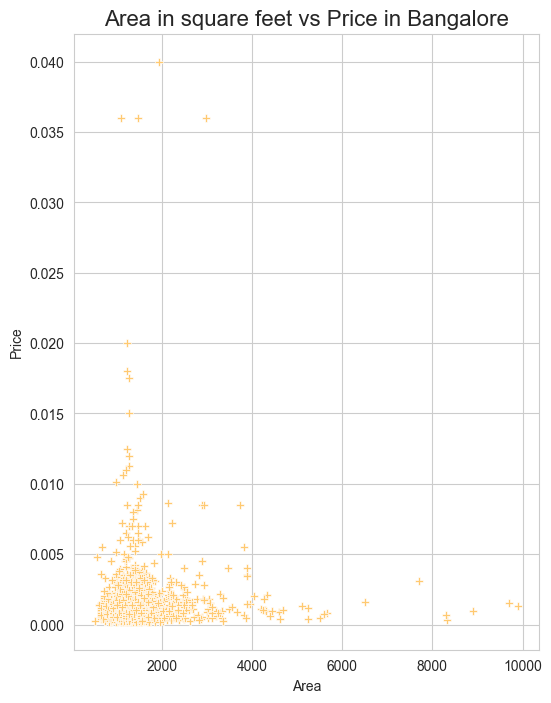

In [141]:
scatter_plot(df5,'Bangalore',custom_colors[4])

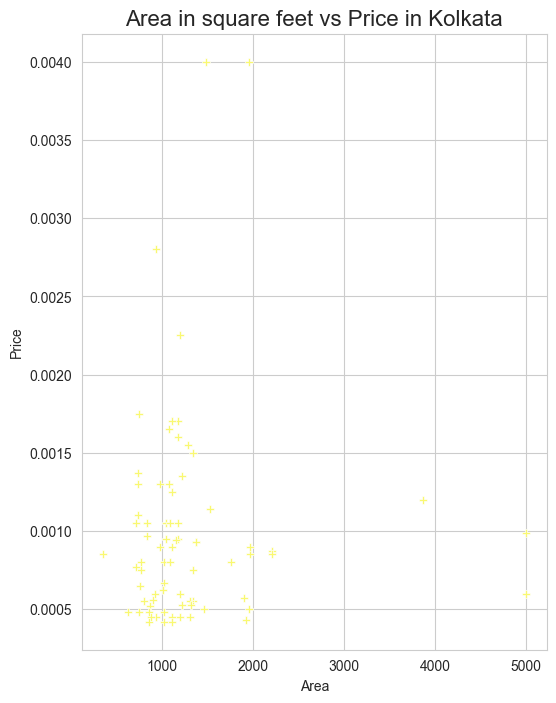

In [142]:
scatter_plot(df6,'Kolkata',custom_colors[5])

In [143]:
frames = [df1,df2,df3,df4]
merged = pd.concat(frames)
merged = merged.loc[:, ~merged.columns.str.contains('^Unnamed')]

In [144]:
def preprocess(df) :
    df = df[['Location','Latitude','Longitude','Price']]
    df = df.replace('NA', np.nan)
    df.dropna(subset=['Latitude'], inplace=True)
    df.dropna(subset=['Price'], inplace=True)
    df["Latitude"] = df["Latitude"].astype(float)
    df["Longitude"] = df["Longitude"].astype(float)
    return df

In [145]:
map1_df = preprocess(df1)
map2_df = preprocess(df2)
map3_df = preprocess(df3)
map4_df = preprocess(df4)
map5_df = preprocess(df5)
map6_df = preprocess(df6)

In [146]:
city_map = folium.Map(location=[19.08,72.74], zoom_start=11.2)
mc = MarkerCluster()
for idx, row in map1_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

In [147]:
city_map = folium.Map(location=[28.69,76.95], zoom_start=10)
mc = MarkerCluster()
for idx, row in map2_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

In [148]:
city_map = folium.Map(location=[13.04,80], zoom_start=10.5)
mc = MarkerCluster()
for idx, row in map3_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

In [149]:
city_map = folium.Map(location=[17.4,78.2], zoom_start=10)
mc = MarkerCluster()
for idx, row in map4_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

In [150]:
city_map = folium.Map(location=[12.97,77.59], zoom_start=10.5)
mc = MarkerCluster()
for idx, row in map5_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

In [151]:
city_map = folium.Map(location=[22.57,88.36], zoom_start=10.5)
mc = MarkerCluster()
for idx, row in map6_df.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        popup = """
        Location : <b>%s</b><br>
        Price : <b>%s</b><br>
        """ % (row['Location'], row['Price'])
        mc.add_child(Marker([row['Latitude'], row['Longitude']],tooltip=popup))
    city_map.add_child(mc)
city_map

In [152]:
c1 = ["#4e89ae","#BFD5E2"]
c2 = ["#c56183","#E6BCCA"]
c3 = ["#ed6663","#F7BDBC"]
c4 = ["#ffa372","#FFDECC"]
c5 = ["#ffc970","#FFEBCC"]
c6 = ["#f9f871","#FFF9E6"]

In [153]:
def pie_chart(df,link,c,addAll = True):
    df = df.iloc [:,5:-2] 
    fig = go.Figure()
    for column in df.columns.to_list():
        val = df[column].value_counts().rename_axis('unique_values').reset_index(name='val_count')
        labels = val['unique_values']
        values = val['val_count']
        fig.add_trace(
            go.Pie(
                labels=labels, 
                values=values,
                marker_colors=c
            )
        )
        button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible': df.columns.isin(df.columns),
                               'title': 'All',
                               'showlegend':True}])


    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])
    fig.add_layout_image(
    dict(
        source=link,
        xref="paper", yref="paper",
        x=0.5, y=0.95,
        sizex=0.9, sizey=0.6,
        xanchor="center", yanchor="bottom"
    )
    )
    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
            )
        ])
    
    fig.show()

In [154]:
pie_chart(df1,"https://i.imgur.com/OEr0Lw2.png",c1)

In [155]:
pie_chart(df2,"https://i.imgur.com/Byi2BQE.png",c2)

In [156]:
pie_chart(df3,"https://i.imgur.com/8Yxjfhx.png",c3)

In [157]:
pie_chart(df4,"https://i.imgur.com/KXYLDQV.png",c4)

In [158]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()

In [159]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'Latitude',
       'Longitude']

X = merged[feature_names]
y = merged['Price']

In [160]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)

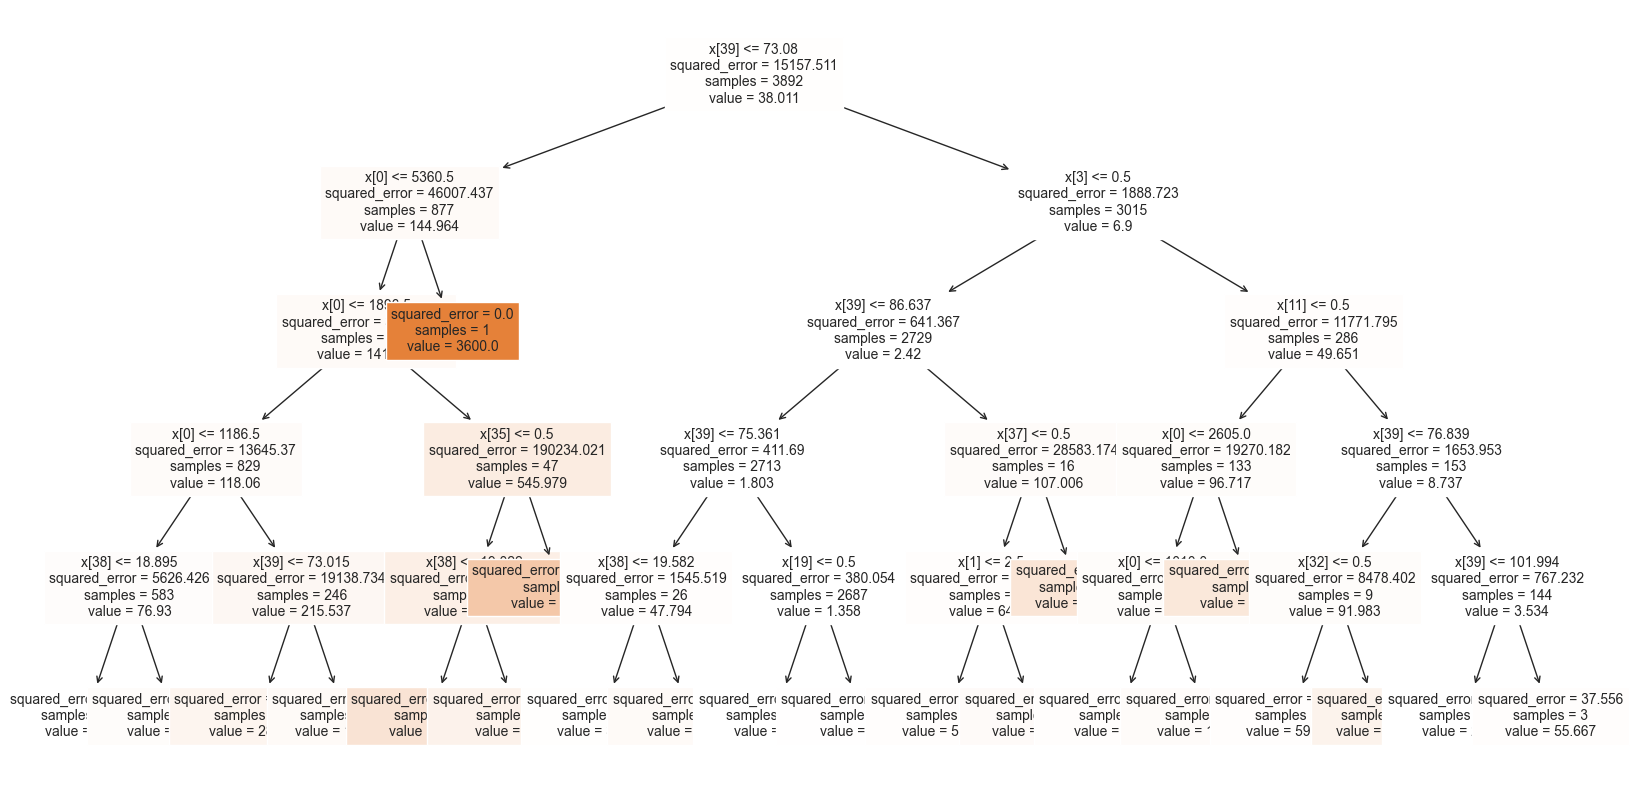

In [161]:
model2 = DecisionTreeRegressor(random_state=0, max_depth=5, min_samples_split=5).fit(train_X, train_y)
# matplot
plt.figure(figsize=(20,10))
tree.plot_tree(model2, filled=True, fontsize=10)
plt.show()

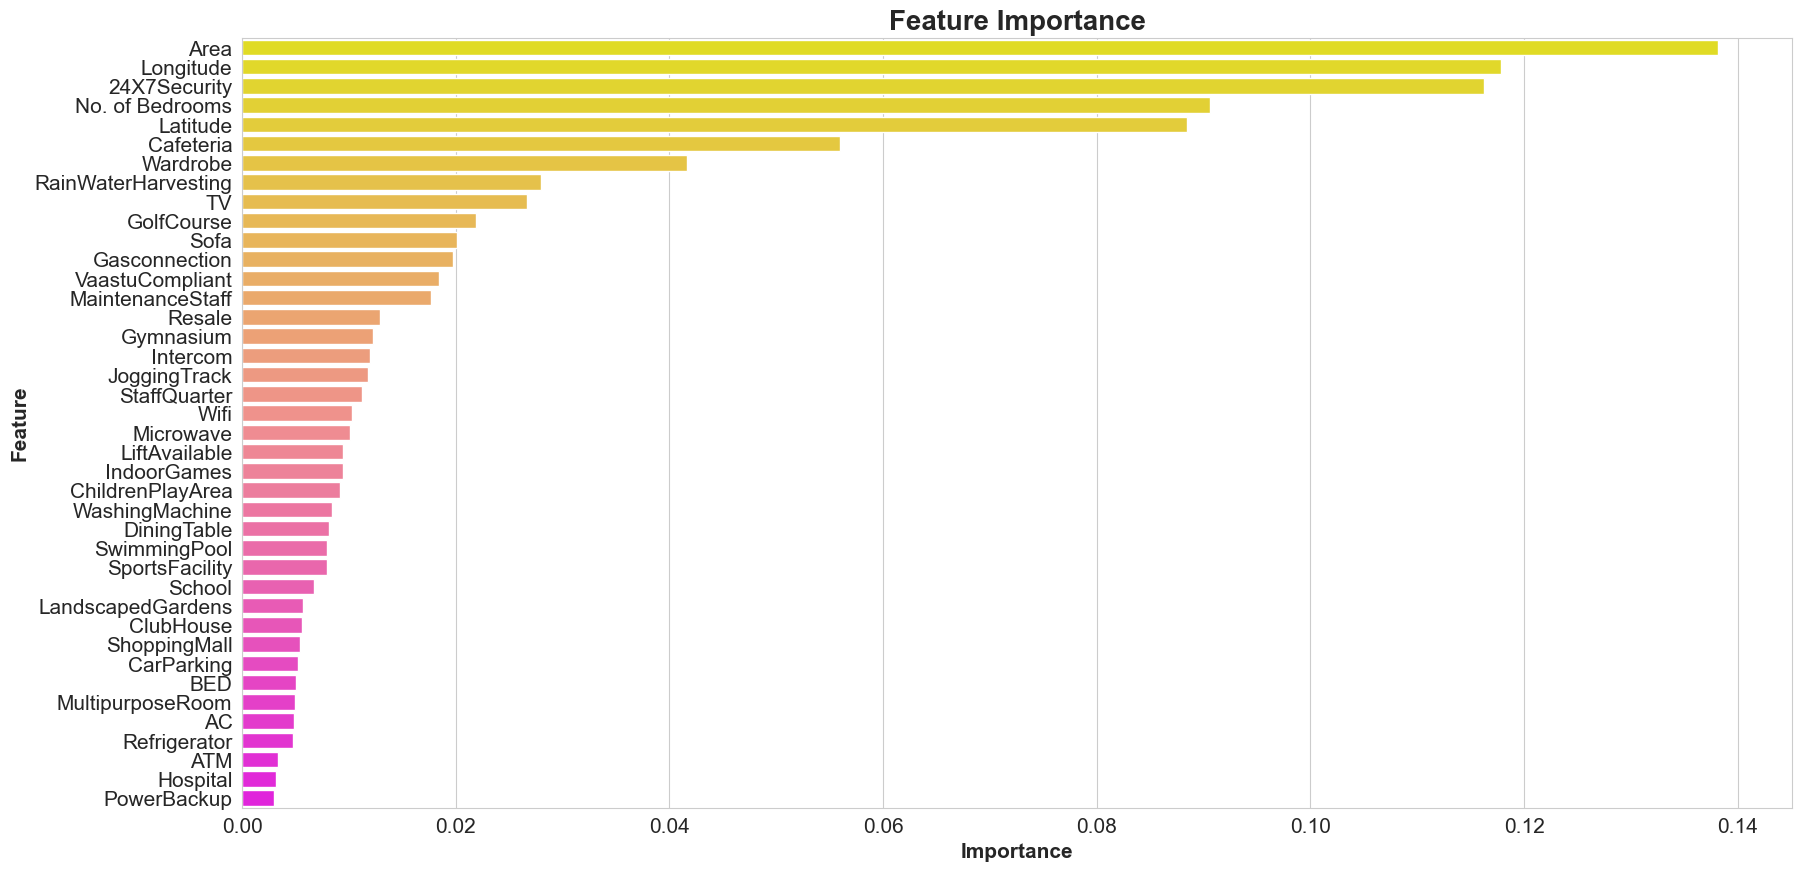

In [162]:
model3 = ExtraTreesRegressor()
model3.fit(train_X, train_y)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [163]:
feature_names = ['Area','No. of Bedrooms','MaintenanceStaff','24X7Security','Latitude','Longitude']

X = merged[feature_names]
y = merged['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [164]:
import joblib

def train_model(m,name):
    model = m
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    r2 = r2_score(val_y, predictions)
    print("{0} mae {1} r2 {2}".format(name,mae,r2))
    # save model
    joblib.dump(model, './models/'+name+'.pkl')


train_model(DecisionTreeRegressor(),"Decision Tree Regressor")
train_model(RandomForestRegressor(),"Random Forest Regressor")   
train_model(XGBRegressor(n_estimators=600),"XGBoost Regressor")   


Decision Tree Regressor mae 11.09588283488291 r2 0.84563538224052
Random Forest Regressor mae 11.728430262842206 r2 0.7978169426196495
XGBoost Regressor mae 9.6897301623011 r2 0.8713138323923543


In [175]:
# predict a sample data
sample = [[1000,2,1,1,22.57,88.36]]

model = joblib.load('./models/Decision Tree Regressor.pkl')
res_DT = model.predict(sample)*100000

model = joblib.load('./models/Random Forest Regressor.pkl')
res_RF = model.predict(sample)*100000

model = joblib.load('./models/XGBoost Regressor.pkl')
res_XGB = model.predict(sample)*100000


print(f"{y_}Decision Tree Regressor:{r_}{res_DT}\n")
print(f"{y_}Random Forest Regressor:{r_}{res_RF}\n")
print(f"{y_}XGBoost Regressor:{r_}{res_XGB}\n")

Decision Tree Regressor:[19100000.]

Random Forest Regressor:[17843476.7]

XGBoost Regressor:[16368312.07275391]

